# Unit 2: Open Food dataset 
###### Candelaria Retamal
###### **10.02.2022**

## Table of contents

<a id="Table"></a>
### [A. An overview of the dataset](#Overview)

### [B. Preliminary Exploratory Data Analysis](#Preliminary)

### [C. In-depth Exploratory Data Analysis](#Indepth)

### [D. Text data](#Text)

### [E. Time-series data](#Timeseries)

### [F. Correlation analysis](#Correlation)

<a id="Overview"></a>
### **A. An overview of the dataset**

We provide the data as a compressed pickle file. We recommend loading it using the pandas read_pickle function and setting the compression parameter to ‘zip’. For more information on the read_pickle function, please check the online|m

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.datasets import fetch_openml

%load_ext lab_black
%matplotlib inline

#### A1. Import the data as a pandas DataFrame into your notebook.
We use the read_pickle function as suggested, incorporating compression=zip

In [2]:
df = pd.read_pickle("data_385k.pkl", compression="zip")

#### A2. Check the number of rows and columns. You should have 385’384 samples and 99 columns.

In [3]:
# Number of rows
print(df.shape[0])
# Number of columns
print(df.shape[1])

385384
99


#### A3. Display a few entries from the DataFrame.


In [4]:
df.head(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
385379,0.0,7640145040283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385380,0.0,7640147023628,850.0,mg,48.6,9.72,g,NaN,NaN,NaN,...,45.0,mg,10.5,mg,500.0,mg,NaN,NaN,37.5,mg
385381,0.0,3046920021593,NaN,NaN,22.0,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385382,0.0,4044889004335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385383,0.0,7613379866622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### A4. Check the data type for each column. Create separate lists to hold the names of columns of the same data type.

For checking the type of each column we first make a quick chek in the Dtype of each column that conformas the DataFrame

In [6]:
# The command dtypes will be used for checking the data type in every column
df.dtypes

alcohol_by_volume                                  float64
barcode                                             object
calcium_per_hundred                                float64
calcium_unit                                        object
carbohydrates_per_hundred                          float64
                                                    ...   
vitamin_c_ascorbic_acid_unit                        object
vitamin_d_d2_d3_international_units_per_hundred    float64
vitamin_d_d2_d3_international_units_unit            object
zinc_per_hundred                                   float64
zinc_unit                                           object
Length: 99, dtype: object

In [7]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [8]:
# For creating separate lists to hold the names of the columns with the same dtype:
float64_type = df.select_dtypes(include=[np.float64]).columns.values.tolist()
object_type = df.select_dtypes(include=[np.object]).columns.values.tolist()
int64_type = df.select_dtypes(include=[np.int64]).columns.values.tolist()

##### [Return to the table of contents](#Table)

<a id="Preliminary"></a>
### **B. Preliminary Exploratory Data Analysis**
My goal is to get familiar with the strengths and weaknesses of the dataset. For preparing the dataset for the in-depth analysis the following tasks must be accomplished:

#### B1. Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

For responding to the first question, we may check the existance of any duplicated products in the list. As the dataframe is big we will ask for the sum of duplicated data.

In [9]:
print("There are a total of " + str(df.duplicated().sum()) + " duplicated products")

There are a total of 10500 duplicated products


In [10]:
# Remove the duplicated products from the dataset
df.drop_duplicates(inplace=True)
# Finally, we check the new shape of the dataset
df.shape

(374884, 99)

The new dataset has exactly **10500** rows less than the original dataset. Hence the total amount of duplicated products were removed from the DF

#### B2. Show the proportion of missing values in the data using appropriate visualizations and numerical summaries

We will start by showing the proportion of missing values using visualizations. For accomplishing this task we will take a look at the missing values per sample.

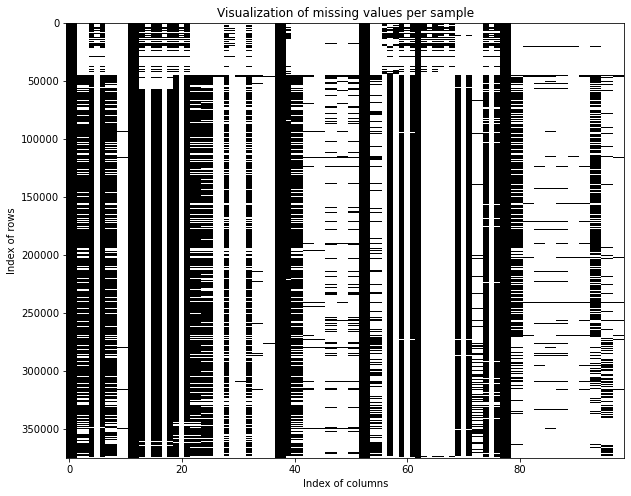

In [11]:
# This is a representation of the occupation of cells in the dataset.
plt.figure(figsize=(10, 8))
plt.title("Visualization of missing values per sample")
plt.xlabel("Index of columns")
plt.ylabel("Index of rows")
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

Apparently, the first columns seem to have more information than the last ones. For having a clearer mapping of the situation we will now incorporate a final visual mapping based on each available feature:

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

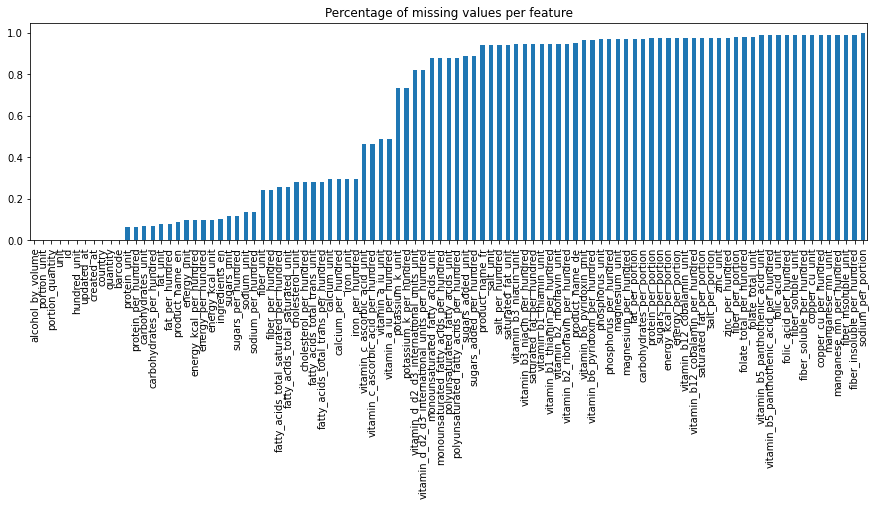

In [12]:
# If we check the % of missing information per feature
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature"
)

According to this last visualization map, most of the features have more than an 80% of missing values. Depending on the nature of the missing data we will be able to know how robust is the dataset that we have in the present for working. Still, this amount of missing data may be an indicator of an urgent need of removing a large amount of incomplete samples that may not be filled with relevant data.

For the nummerical summaries we will first check the existance of unique values. This process will give us some insights about the number of binary, ordinal and continuous features in the dataset.

In [13]:
# First we check the columns which dtype is numeric
unique_numeric = df.select_dtypes(include="number").nunique().sort_values()
unique_numeric.head(5)

manganese_mn_per_hundred           30
fiber_soluble_per_hundred          33
fiber_insoluble_per_hundred        40
alcohol_by_volume                  97
vitamin_b1_thiamin_per_hundred    115
dtype: int64

In [14]:
# Now we check the columns with an object dtype
unique_obj = df.select_dtypes(include="object").nunique()
unique_obj.count()

48

While for the numerical columns, no binary attributes were found, within the object columns, at least 37 attributes seem to have an only available value. This may indicate that these columns can be easily filled with the same value that all of the rest of the rows have. Additionally, this columns do not provide much information to the analysis. **It is important to note that all of these attributes corresopnd to a property that contains the name unit.**

It can also be interesting to take a look at the columns that present the higher amount of missing values. What kind of information do they contain?

In [15]:
df.isnull().sum().sort_values().tail(20)

saturated_fat_per_portion                   365155
salt_per_portion                            365170
zinc_unit                                   366351
zinc_per_hundred                            366369
fiber_per_portion                           366707
folate_total_per_hundred                    367188
folate_total_unit                           367188
vitamin_b5_panthothenic_acid_unit           370325
vitamin_b5_panthothenic_acid_per_hundred    370343
folic_acid_unit                             370409
folic_acid_per_hundred                      370428
fiber_soluble_unit                          371055
fiber_soluble_per_hundred                   371057
copper_cu_unit                              371273
copper_cu_per_hundred                       371273
manganese_mn_unit                           371347
manganese_mn_per_hundred                    371350
fiber_insoluble_unit                        371374
fiber_insoluble_per_hundred                 371375
sodium_per_portion             

The attributes that present the biggest amount of missing data correspond to several vitamins and minerals, and their corresponding contribution per portion, per unit and per hundred.

As a final step we will see how many columns may be found in different proportion intervals of missing information. This will give us a clear idea of the percentage of columns that do not have enough information in the dataset

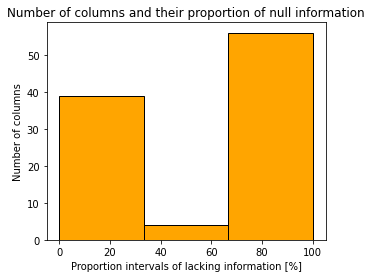

In [16]:
# % of null information in the columns
null_percentage = df.isnull().sum() / df.shape[0] * 100

hist = null_percentage.plot.hist(
    bins=3, color="orange", edgecolor="black", range=[0, 100], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

Approximately, a 55% of the columns lack at least an 80% of their information. This is information, that will be difficult to fill with other values, because we have already seen that no many attributes present binary information. In most cases, the information contained in the columns may be found in a large range of numerical options.

Finally, we will check if there is any relationship between the amount of missing information and the nature (Type) of the data contained in each interval of the plot. For this we create a dataframe that contains the proportion of lacking information and the type of the columns saved as a string attribute

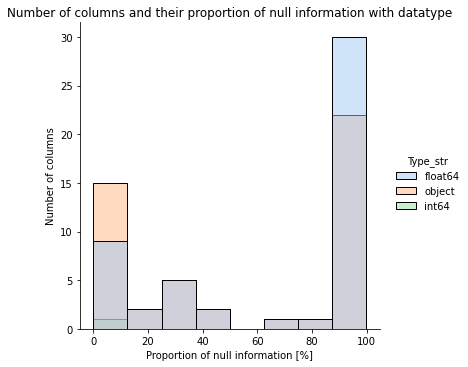

In [17]:
# For ploting a histogram with hue = datatype
# Create auxliary data frame in pandas
aux_plot = pd.DataFrame()
aux_plot["Null_val"] = null_percentage
aux_plot["Type_str"] = df.dtypes.astype("string")

# Plot the histogram including a hue that represents the dtype
p = sns.displot(data=aux_plot, x="Null_val", hue="Type_str", palette="pastel")
p.set(
    xlabel="Proportion of null information [%]",
    ylabel="Number of columns",
    title="Number of columns and their proportion of null information with datatype",
)

The plotted histogram shows that the columns that are missing information are mainly numerical, while the complete columns are more likely to be of object type.

In [18]:
# For future analysis, the indices of the columns that have a unique value among their rows is saved in the list unique
unique = []
for x in range(0, len(unique_obj)):
    if unique_obj[x] == 1:
        unique.append(unique_obj.index[x])

In [19]:
no_info = df.isnull().sum().sort_values(ascending=False)[:60]
# intersection of the series that contain unique values, and the 60 fisrt elements that contain less information.
intersect = pd.Series(np.intersect1d(no_info.index, unique))

#### B3. Now that you know the extent of missing values in the data, you should address them. Your goal is to keep as much data as possible in your DataFrame. What is the shape of the remaining data?

* As a first step, all of the information that only contains one option of value (in the object type), will be replaced by the only value that it may acquire

In [20]:
# We fill the NaN values of the columns saved in unique. For filling this columns, there is an only value that may be incorporated (as it was previously stated)
for x in unique:
    df[str(x)].fillna(value=df[str(x)].bfill(), inplace=True)
    df[str(x)].fillna(value=df[str(x)].ffill(), inplace=True)

If we take a quick look to the histogram that compares the number of columns and their proportion of lacking information

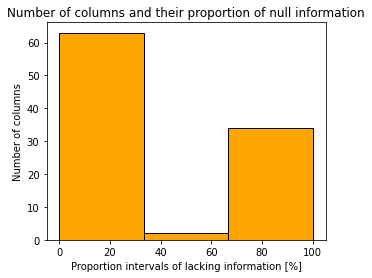

In [21]:
# % of null information in the columns
null_percentage = df.isnull().sum() / df.shape[0] * 100

hist = null_percentage.plot.hist(
    bins=3, color="orange", edgecolor="black", range=[0, 100], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

We can see that the number of columns that lack of more than a 70% of the information has decreased from a 55% to a 35% thanks to the filling of the nan values in the object type unique columns.

* As a second step, we will only maintain those columns that count with more than a 40% of information

In [22]:
# We recalculate the null percentage:
null_percentage = df.isnull().sum() / df.shape[0] * 100
more_70 = []
for x in range(0, len(null_percentage)):
    if null_percentage[x] >= 40:
        df.drop([null_percentage.index[x]], axis=1, inplace=True)

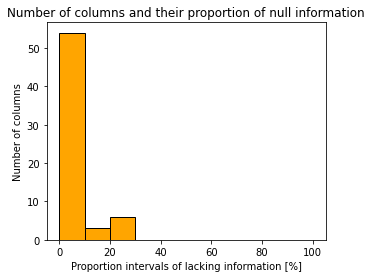

In [23]:
null_percentage = df.isnull().sum() / df.shape[0] * 100
hist = null_percentage.plot.hist(
    bins=10, color="orange", edgecolor="black", range=[0, 100], figsize=(5, 4)
)
hist.set_xlabel("Proportion intervals of lacking information [%]")
hist.set_ylabel("Number of columns")
hist.set_title("Number of columns and their proportion of null information")
plt.show()

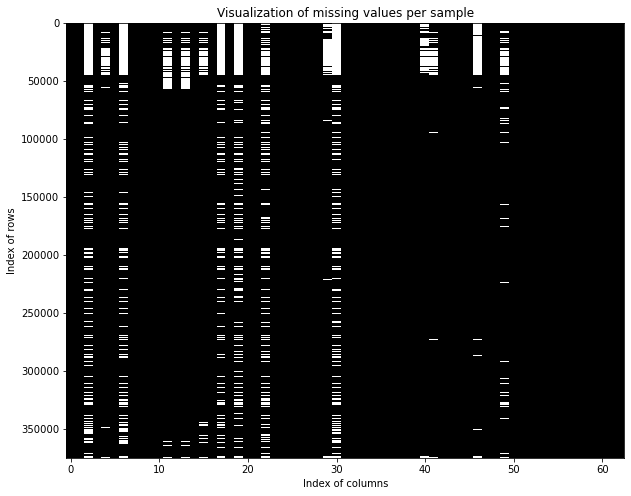

In [24]:
# This is a representation of the occupation of cells in the dataset.
plt.figure(figsize=(10, 8))
plt.title("Visualization of missing values per sample")
plt.xlabel("Index of columns")
plt.ylabel("Index of rows")
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")

In [25]:
null_cols = (
    df.isnull().sum().sort_values(ascending=False).head(15).index.values.tolist()
)

In [26]:
df[null_cols].head(5)

,iron_per_hundred,calcium_per_hundred,fatty_acids_total_trans_per_hundred,cholesterol_per_hundred,fatty_acids_total_saturated_per_hundred,fiber_per_hundred,sodium_per_hundred,sugars_per_hundred,ingredients_en,energy_per_hundred,energy_kcal_per_hundred,product_name_en,fat_per_hundred,carbohydrates_per_hundred,protein_per_hundred
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Superior quality durum wheat Pasta\r\n\r\nIngr...,1500.0,359.0,Bio Spaghetti,0.42,75.00,11.00
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.50,"Bio Milk (Switzerland), kitchen salt",1010.0,242.0,Naturaplan Mozzarella,18.00,1.50,19.00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,100% coffee Arabica,1358.3,325.0,Caffè Mauro - Roasted organic coffee blend,12.08,52.68,19.05
3,NaN,NaN,NaN,NaN,NaN,9.1,NaN,65.80,"Powdered chocolate 99% (sugar, cocoa), emulsif...",1679.0,402.0,Le chocolat Cailler - chocolate powder,7.90,70.40,6.80
4,NaN,NaN,NaN,NaN,NaN,9.0,NaN,29.00,"cocoa paste * (Honduras), raw cane sugar * (Pa...",2470.0,591.0,Naturaplan Extra Dark Chocolate 70%,44.00,37.00,8.00


We will check if there is any relationship between the columns that lack the biggest amount of information and any other column that could be related. For this, we will check all of the columns containing the string sugar.

In [27]:
# Select columns that contains the string 'sugar'
sugar_cols = [col for col in df.columns if "sugar" in col]
sugars = df[sugar_cols]
sugars.head(5)

,sugars_added_unit,sugars_per_hundred,sugars_unit
0,g,NaN,g
1,g,1.50,g
2,g,0.25,g
3,g,65.80,g
4,g,29.00,g


We may see that the only numeric value is sugars_per_hundred, then the other two columns are not usefull for filling the missing data

* Finally we will compute the new shape of the data

In [28]:
# Number of rows
print(df.shape[0])
# Number of columns
print(df.shape[1])

374884
63


#### B4. Let’s continue exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

*  The number of unique values in categorical variables has already been computed and corresponds to:

In [29]:
# Now we check the columns with an object dtype
object_type = df.select_dtypes(include="object").nunique()
unique_objects = []
for x in range(0, len(object_type)):
    if object_type[x] == 1:
        unique_objects.append(object_type.index[x])

In [30]:
print(
    "Within the categorical variables "
    + str(len(unique_objects))
    + " out of a total of "
    + str(len(object_type))
    + " columns contain unique values"
)

Within the categorical variables 37 out of a total of 46 columns contain unique values


* Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations

Text(0.5, 1.0, 'Proportion of samples in each level for the variable unit')

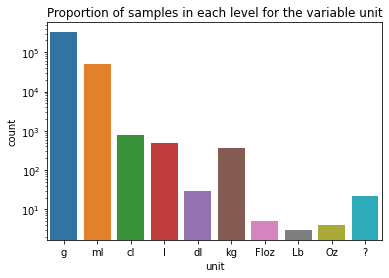

In [31]:
sns.countplot(x="unit", data=df, log=True)
plt.title("Proportion of samples in each level for the variable unit")

Text(0.5, 1.0, 'Proportion of samples in each level for the variable country')

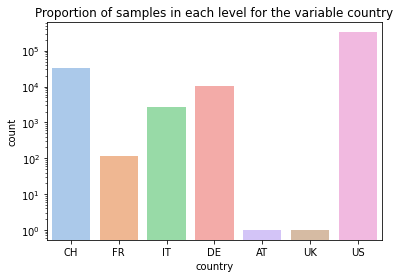

In [32]:
# No zoom
sns.countplot(x="country", palette="pastel", data=df, log=True)
plt.title("Proportion of samples in each level for the variable country")

In [33]:
filter_country = df["country"] == "AT"
df_keep = df.loc[filter_country, "country"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the information of AT  the new shape is " + str(df.shape))

filter_country = df["country"] == "UK"
df_keep = df.loc[filter_country, "country"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the information of UK the new shape is " + str(df.shape))

After eliminating the information of AT  the new shape is (374883, 63)
After eliminating the information of UK the new shape is (374882, 63)


**Observations**

#### B5. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

* Provide descriptive statistics of the numerical variables

In [34]:
# Using the following commmand the required information is computed
df.describe().loc[["mean", "min", "max"]].T

,mean,min,max
alcohol_by_volume,0.027911,0.0,57.90
calcium_per_hundred,116.647405,0.0,684000.00
carbohydrates_per_hundred,34.005315,0.0,6400.00
cholesterol_per_hundred,58.981358,0.0,250000.00
energy_kcal_per_hundred,272.485548,0.0,39600.00
energy_per_hundred,1139.518310,0.0,165686.40
fat_per_hundred,12.705415,0.0,3200.00
fatty_acids_total_saturated_per_hundred,4.943331,0.0,1000.00
fatty_acids_total_trans_per_hundred,0.034861,0.0,615.38
fiber_per_hundred,2.925632,0.0,1730.00


* Provide informative plots of the numerical variables

Text(0.5, 0, 'Numerical Variables')

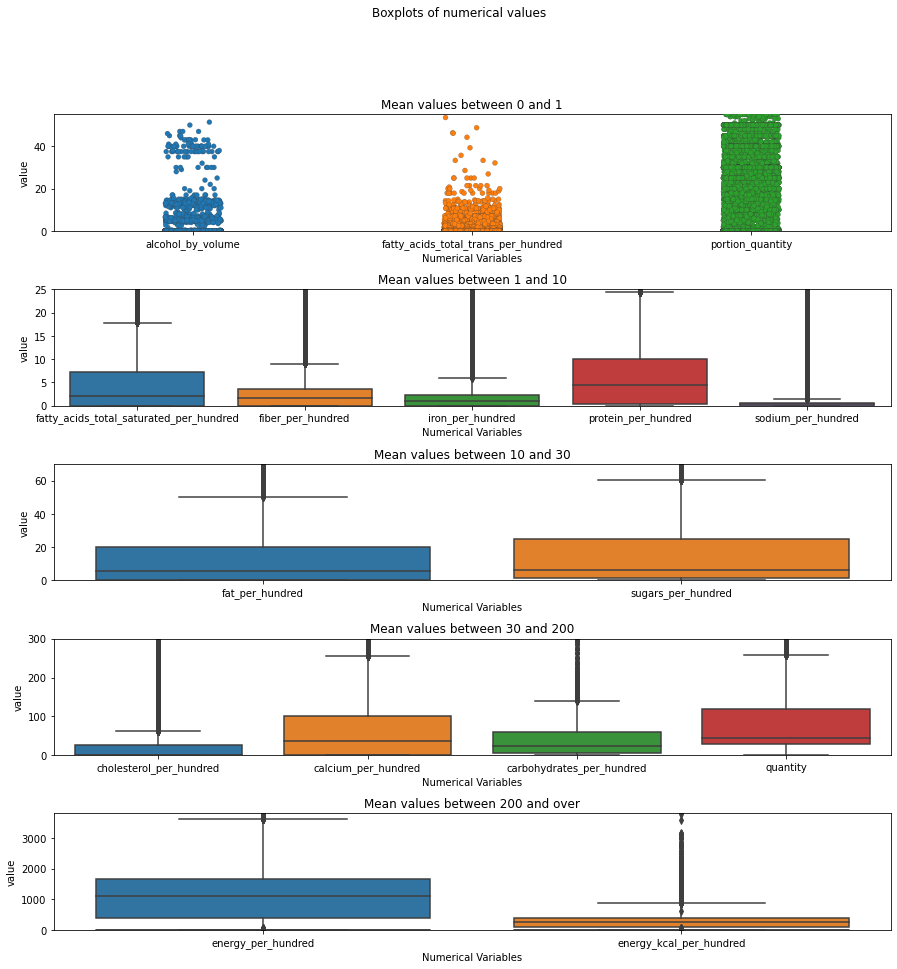

In [35]:
"portion_quantity"  # for visualization we will group elements with similar mean values in a same boxplot

# TWe create sub dfs for saving information from columns, with similar mean values:
## Mean: 0-1
df0 = df[
    [
        "alcohol_by_volume",
        "fatty_acids_total_trans_per_hundred",
        "portion_quantity",
    ]
].copy()

## Mean: 1-10
df1 = df[
    [
        "fatty_acids_total_saturated_per_hundred",
        "fiber_per_hundred",
        "iron_per_hundred",
        "protein_per_hundred",
        "sodium_per_hundred",
    ]
].copy()
## 10-30
df2 = df[
    [
        "fat_per_hundred",
        "sugars_per_hundred",
    ]
].copy()

##Mean: 30-200
df3 = df[
    [
        "cholesterol_per_hundred",
        "calcium_per_hundred",
        "carbohydrates_per_hundred",
        "quantity",
    ]
].copy()

# Mean: 200 or more
df4 = df[
    [
        "energy_per_hundred",
        "energy_kcal_per_hundred",
    ]
].copy()

# For making the plots:

# Generate the attributes of the subplot figure
fig, axes = plt.subplots(5, 1, figsize=(15, 15))

# Adjust the subplot layout parameters
fig.subplots_adjust(hspace=0.5, wspace=0.125)

# Common title
fig.suptitle("Boxplots of numerical values")

# First mean value
sns.boxplot(x="variable", y="value", data=pd.melt(df0))
# Inclusion of stripplot for investigating cause of such a small mean value
sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(df0),
    linewidth=0.2,
    ax=axes[0],
)
axes[0].set_title("Mean values between 0 and 1")
axes[0].set_ylim(0, 55)
axes[0].set_xlabel("Numerical Variables")


sns.boxplot(x="variable", y="value", data=pd.melt(df1), ax=axes[1])
axes[1].set_title("Mean values between 1 and 10")
axes[1].set_ylim(0, 25)
axes[1].set_xlabel("Numerical Variables")

sns.boxplot(x="variable", y="value", data=pd.melt(df2), ax=axes[2])
axes[2].set_title("Mean values between 10 and 30")
axes[2].set_ylim(0, 70)
axes[2].set_xlabel("Numerical Variables")

sns.boxplot(x="variable", y="value", data=pd.melt(df3), ax=axes[3])
axes[3].set_title("Mean values between 30 and 200")
axes[3].set_ylim(0, 300)
axes[3].set_xlabel("Numerical Variables")

sns.boxplot(x="variable", y="value", data=pd.melt(df4), ax=axes[4])
axes[4].set_title("Mean values between 200 and over")
axes[4].set_ylim(0, 3800)
axes[4].set_xlabel("Numerical Variables")

**Observations**

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

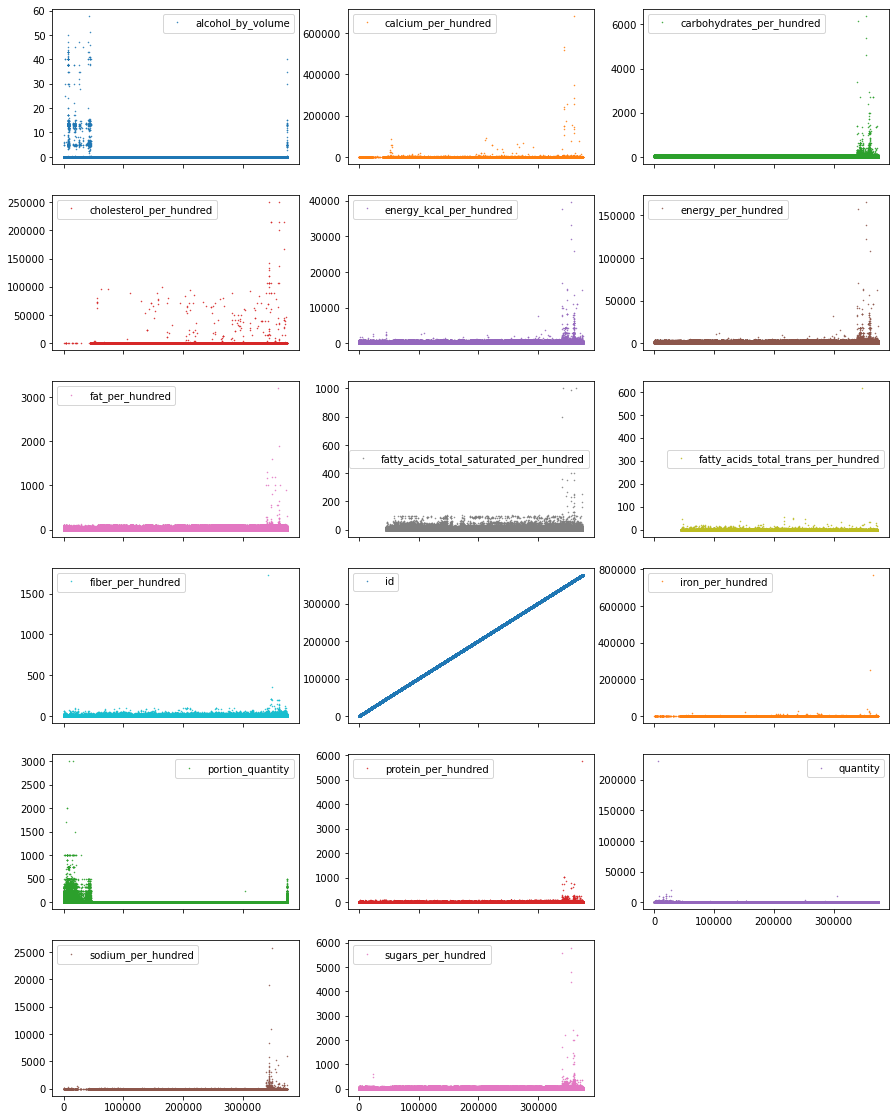

In [36]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(15, 20), markersize=1)

**Observations**  

#### B6. Address any unrealistic values or errors. The statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) can help you spot these values. Afterwards re-do the descriptive statistics and plots to check everything is ok now. Below are some additional tips and hints.

* **Create a new list to hold the columns with the per_hundred suffix in their names.**
* **The range of acceptable values in each column depends on the unit of each column. You can find the unit of each column in the associated unit column. For example, the protein_per_hundred column unit is found in the protein_unit column, etc.**
* **The unit of the protein_per_hundred column is g, which means that the values in this column should range between 0 and 100. If a column’s unit is mg, then the values should range between 0 and 100000.**
* **If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this Wikipedia page to define an upper threshold value.**

* We start by creating the new DF for holding the columns with the per_hundred suffix in their names

In [37]:
# Select columns that contains the string 'per_hundred'
per_hundred_cols = [col for col in df.columns if "per_hundred" in col]
per_hundred = df[per_hundred_cols]
per_hundred.head(5)

,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,iron_per_hundred,protein_per_hundred,sodium_per_hundred,sugars_per_hundred
0,NaN,75.00,NaN,359.0,1500.0,0.42,NaN,NaN,NaN,NaN,11.00,NaN,NaN
1,NaN,1.50,NaN,242.0,1010.0,18.00,NaN,NaN,0.0,NaN,19.00,NaN,1.50
2,NaN,52.68,NaN,325.0,1358.3,12.08,NaN,NaN,NaN,NaN,19.05,NaN,0.25
3,NaN,70.40,NaN,402.0,1679.0,7.90,NaN,NaN,9.1,NaN,6.80,NaN,65.80
4,NaN,37.00,NaN,591.0,2470.0,44.00,NaN,NaN,9.0,NaN,8.00,NaN,29.00


In [38]:
## Teniendo la redefinición, se buscan los índices coindicentes entre per hundred y max_range
## List add this column to the dataframe that contains the ranges

numeric_info = per_hundred.columns.values.tolist()
numeric_info

['calcium_per_hundred',
 'carbohydrates_per_hundred',
 'cholesterol_per_hundred',
 'energy_kcal_per_hundred',
 'energy_per_hundred',
 'fat_per_hundred',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_per_hundred',
 'iron_per_hundred',
 'protein_per_hundred',
 'sodium_per_hundred',
 'sugars_per_hundred']

In [39]:
per_unit_cols = [col for col in df.columns if "unit" in col]
per_unit = df[per_unit_cols]
max_range = pd.DataFrame(per_unit.iloc[1, :])
max_range.columns = ["Unit"]
max_range.head(5)

,Unit
calcium_unit,mg
carbohydrates_unit,g
cholesterol_unit,mg
copper_cu_unit,mg
energy_kcal_unit,kCal


In [40]:
## Debo definir las equivalencias sugeridas para mg, g, IU, etc..
def my_func(lista, col_position):
    range_values = []
    for x in range(0, len(lista)):
        if lista.iloc[x, col_position] == "mg":
            range_values.append(100000)
        elif lista.iloc[x, col_position] == "g":
            range_values.append(100)
        elif lista.iloc[x, col_position] == "µg":
            range_values.append(100000000)
        elif lista.iloc[x, col_position] == "kJ":
            range_values.append(3700)
        elif lista.iloc[x, col_position] == "kCal":
            range_values.append(3700 / 4.184)
        elif (
            lista.iloc[x, col_position] == "IU"
            and lista.index[x] == "vitamin_a_iu_unit"
        ):
            range_values.append(3.333 * 10 ** 8)
        elif (
            lista.iloc[x, col_position] == "IU"
            and lista.index[x] == "vitamin_d_d2_d3_international_units_unit"
        ):
            range_values.append(0.4 * 10 ** 9)
    return range_values

In [41]:
max_range["Minimum"] = 0
max_range["Maximum"] = my_func(max_range, 0)

In [42]:
## Teniendo la redefinición, se buscan los índices coindicentes entre per hundred y max_range
def transform(s):
    s = s.str.replace("_units?", "_per_hundred", regex=True)
    return s


## List add this column to the dataframe that contains the ranges
minerals = transform(max_range.index)
max_range["Finding name"] = minerals

In [43]:
# Only maintain data that is available in the numeric _per_hundred
max_range = max_range[max_range["Finding name"].isin(numeric_info)]
max_range

,Unit,Minimum,Maximum,Finding name
calcium_unit,mg,0,100000.000000,calcium_per_hundred
carbohydrates_unit,g,0,100.000000,carbohydrates_per_hundred
cholesterol_unit,mg,0,100000.000000,cholesterol_per_hundred
energy_kcal_unit,kCal,0,884.321224,energy_kcal_per_hundred
energy_unit,kJ,0,3700.000000,energy_per_hundred
fat_unit,g,0,100.000000,fat_per_hundred
fatty_acids_total_saturated_unit,g,0,100.000000,fatty_acids_total_saturated_per_hundred
fatty_acids_total_trans_unit,g,0,100.000000,fatty_acids_total_trans_per_hundred
fiber_unit,g,0,100.000000,fiber_per_hundred
iron_unit,mg,0,100000.000000,iron_per_hundred


In [44]:
# elements in units of mg
unit_mg = pd.DataFrame()
unit_g = pd.DataFrame()
unit_kCal = pd.DataFrame()
unit_kJ = pd.DataFrame()
for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "mg":
        unit_mg[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )

for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "g":
        unit_g[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )


for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "kCal":
        unit_kCal[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )
for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "kJ":
        unit_kJ[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )

Text(0.5, 0, 'Numerical per hundred variables')

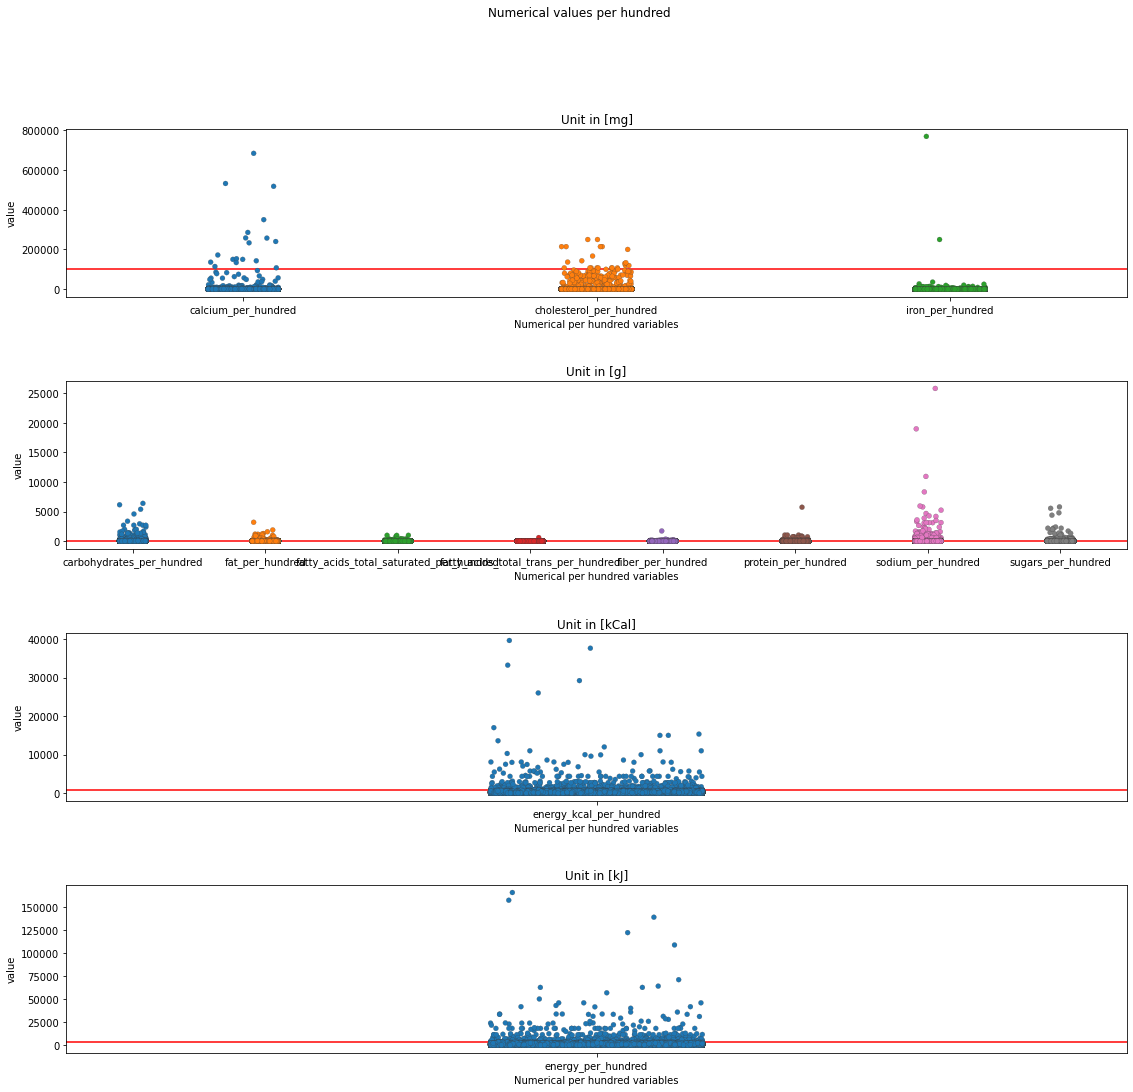

In [45]:
# Generate the attributes of the subplot figure
fig, axes = plt.subplots(4, 1, figsize=(19, 17))

# Adjust the subplot layout parameters
fig.subplots_adjust(hspace=0.5, wspace=0.125)

# Common title
fig.suptitle("Numerical values per hundred")

# First mean value

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_mg),
    linewidth=0.2,
    ax=axes[0],
)
axes[0].axhline(10 ** 5, color="red")
axes[0].set_title("Unit in [mg]")
axes[0].set_xlabel("Numerical per hundred variables")


sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_g),
    linewidth=0.2,
    ax=axes[1],
)
axes[1].axhline(100, color="red")
axes[1].set_title("Unit in [g]")
axes[1].set_xlabel("Numerical per hundred variables")

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_kCal),
    linewidth=0.2,
    ax=axes[2],
)
axes[2].axhline(3700 / 4.184, color="red")
axes[2].set_title("Unit in [kCal]")
axes[2].set_xlabel("Numerical per hundred variables")

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_kJ),
    linewidth=0.2,
    ax=axes[3],
)
axes[3].axhline(3700, color="red")
axes[3].set_title("Unit in [kJ]")
axes[3].set_xlabel("Numerical per hundred variables")

In [46]:
mg = unit_mg.columns.values.tolist()
for x in range(0, len(mg)):
    filter_mg = df[mg[x]] > 100000
    df_keep = df.loc[filter_mg, mg[x]]
    df = df.drop(df_keep.index, axis=0)

g = unit_g.columns.values.tolist()
for x in range(0, len(g)):
    filter_g = df[g[x]] > 100
    df_keep = df.loc[filter_g, g[x]]
    df = df.drop(df_keep.index, axis=0)

kcal = unit_kCal.columns.values.tolist()
for x in range(0, len(kcal)):
    filter_kcal = df[kcal[x]] > 3700 / 4.184
    df_keep = df.loc[filter_kcal, kcal[x]]
    df = df.drop(df_keep.index, axis=0)

kj = unit_kJ.columns.values.tolist()
for x in range(0, len(kj)):
    filter_kj = df[kj[x]] > 3700
    df_keep = df.loc[filter_kj, kj[x]]
    df = df.drop(df_keep.index, axis=0)

In [47]:
per_hundred_cols = [col for col in df.columns if "per_hundred" in col]
per_hundred = df[per_hundred_cols]
per_hundred.head(5)

# elements in units of mg
unit_mg = pd.DataFrame()
unit_g = pd.DataFrame()
unit_kCal = pd.DataFrame()
unit_kJ = pd.DataFrame()
for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "mg":
        unit_mg[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )

for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "g":
        unit_g[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )


for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "kCal":
        unit_kCal[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )
for i in range(0, len(max_range)):
    if max_range["Unit"][i] == "kJ":
        unit_kJ[max_range["Finding name"][i]] = per_hundred.filter(
            regex=max_range["Finding name"][i]
        )

Text(0.5, 0, 'Numerical per hundred variables')

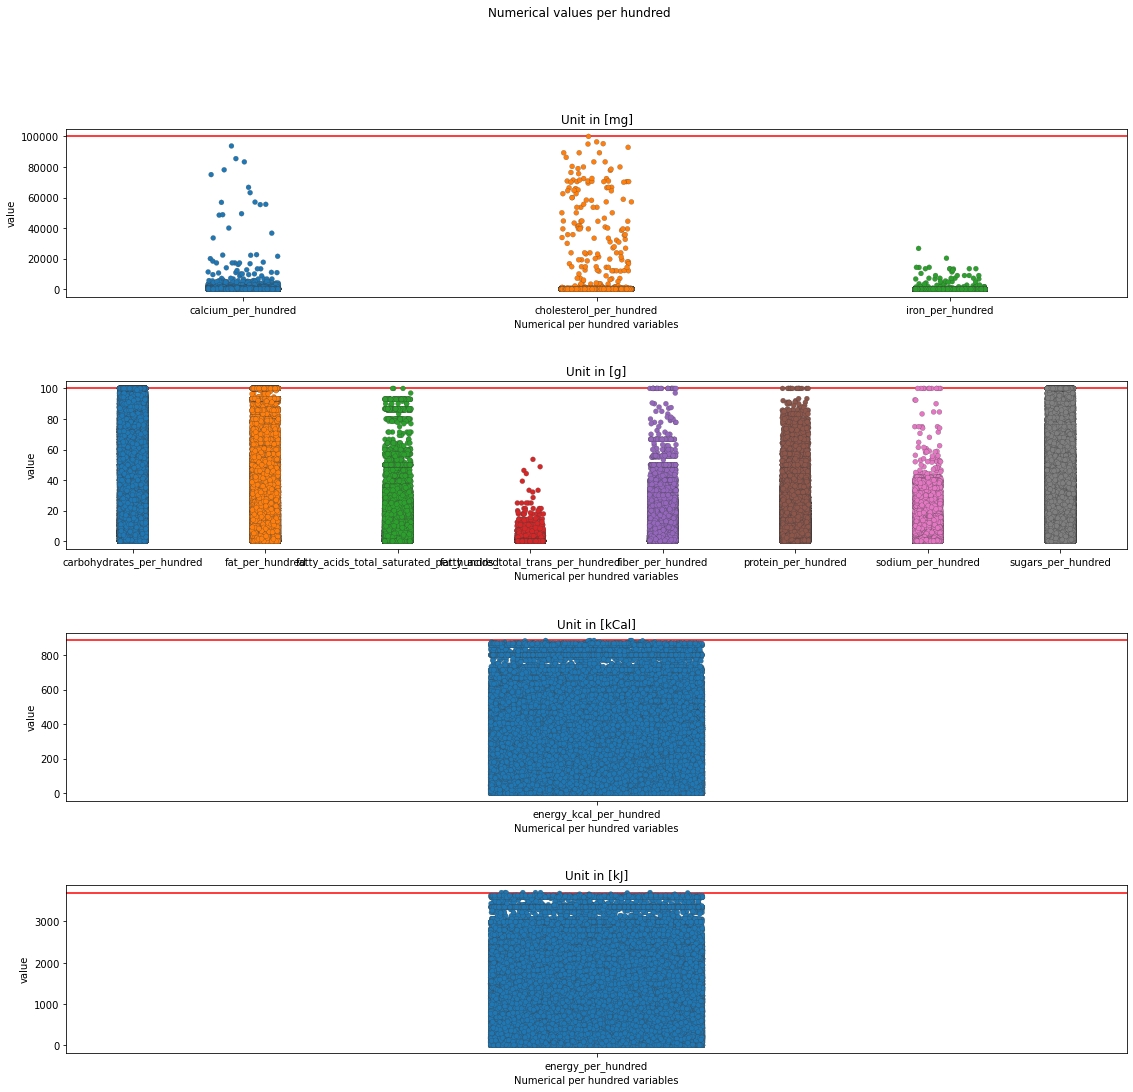

In [48]:
# Generate the attributes of the subplot figure
fig, axes = plt.subplots(4, 1, figsize=(19, 17))

# Adjust the subplot layout parameters
fig.subplots_adjust(hspace=0.5, wspace=0.125)

# Common title
fig.suptitle("Numerical values per hundred")

# First mean value

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_mg),
    linewidth=0.2,
    ax=axes[0],
)
axes[0].axhline(10 ** 5, color="red")
axes[0].set_title("Unit in [mg]")
axes[0].set_xlabel("Numerical per hundred variables")


sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_g),
    linewidth=0.2,
    ax=axes[1],
)
axes[1].axhline(100, color="red")
axes[1].set_title("Unit in [g]")
axes[1].set_xlabel("Numerical per hundred variables")

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_kCal),
    linewidth=0.2,
    ax=axes[2],
)
axes[2].axhline(3700 / 4.184, color="red")
axes[2].set_title("Unit in [kCal]")
axes[2].set_xlabel("Numerical per hundred variables")

sns.stripplot(
    x="variable",
    y="value",
    data=pd.melt(unit_kJ),
    linewidth=0.2,
    ax=axes[3],
)
axes[3].axhline(3700, color="red")
axes[3].set_title("Unit in [kJ]")
axes[3].set_xlabel("Numerical per hundred variables")

In [49]:
# Using the following commmand the required information is computed
df.describe().loc[["mean", "min", "max"]].T

,mean,min,max
alcohol_by_volume,0.028058,0.0,57.90
calcium_per_hundred,97.949266,0.0,93750.00
carbohydrates_per_hundred,33.326990,0.0,100.00
cholesterol_per_hundred,42.628137,0.0,100000.00
energy_kcal_per_hundred,267.862014,0.0,884.00
energy_per_hundred,1120.567103,0.0,3700.00
fat_per_hundred,12.462396,0.0,100.00
fatty_acids_total_saturated_per_hundred,4.847821,0.0,100.00
fatty_acids_total_trans_per_hundred,0.031784,0.0,53.57
fiber_per_hundred,2.883388,0.0,100.00


**Observations**

#### B7. Do you spot any other inconsistencies in the data? What about the sum of a product’s protein, fat, carbohydrates, salt, and fiber content?

The column that provides the numerical information that is going to be included in a new column named sum, indicates the total amount of each nutrient considering a total base of 100 [g]. As every single element in the sum is also in units of [g], we know that the sum of these elements may not surpass the value 100. We will therefore, investigate the histogram and boxplot that summarize the information. 

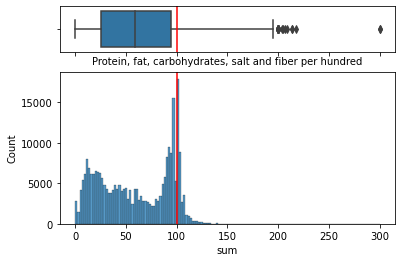

In [50]:
## Create a new column that contains the sum of these three elements
df["sum"] = (
    df["protein_per_hundred"]
    + df["fat_per_hundred"]
    + df["carbohydrates_per_hundred"]
    + df["sodium_per_hundred"]
    + df["fiber_per_hundred"]
)
# Ask for the main statistical relationships
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (3, 10)}
)

# assigning a graph to each ax
sns.boxplot(x=df["sum"], ax=ax_box)
sns.histplot(data=df, x="sum", ax=ax_hist)
ax_box.axvline(100, color="red")
ax_hist.axvline(100, color="red")

# Remove x axis name for the boxplot
ax_box.set(xlabel="Protein, fat, carbohydrates, salt and fiber per hundred")
plt.show()
# plot the corresponding dispersion
# plot the pairplot of these columns

We see that there are several datapoints that in the sum column that surpass the value 100. We will now eliminate this points using the same strategy that we used before

In [51]:
filter_sum = df["sum"] > 100
df_keep = df.loc[filter_sum, "sum"]
df = df.drop(df_keep.index, axis=0)

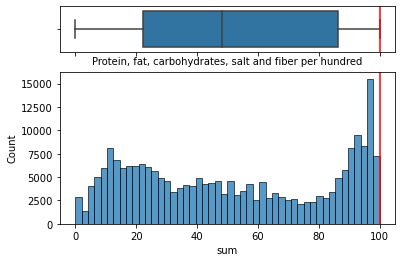

In [52]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(
    2, sharex=True, gridspec_kw={"height_ratios": (3, 10)}
)

# assigning a graph to each ax
sns.boxplot(x=df["sum"], ax=ax_box)
sns.histplot(data=df, x="sum", ax=ax_hist)
ax_box.axvline(100, color="red")
ax_hist.axvline(100, color="red")

# Remove x axis name for the boxplot
ax_box.set(xlabel="Protein, fat, carbohydrates, salt and fiber per hundred")
plt.show()
# plot the corresponding dispersion
# plot the pairplot of these columns

**Observations**

#### B8.  Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers.

We will start the exercise by checking the interquartile range of the _per_hundred values that are contained in the DF. For doing this we will first compute the histograms and boxplots. Afterwards we will look for outlier candidates using the z-score.

In [53]:
Q1 = np.percentile(df.select_dtypes(include=np.number), 25, axis=0)
Q3 = np.percentile(df.select_dtypes(include=np.number), 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [54]:
boxplot_filter = (df.select_dtypes(include=np.number) < lower_bound) | (
    df.select_dtypes(include=np.number) > upper_bound
)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
alcohol_by_volume                            826
calcium_per_hundred                            0
carbohydrates_per_hundred                      0
cholesterol_per_hundred                        0
energy_kcal_per_hundred                        0
energy_per_hundred                             0
fat_per_hundred                                0
fatty_acids_total_saturated_per_hundred        0
fatty_acids_total_trans_per_hundred            0
fiber_per_hundred                              0
id                                             0
iron_per_hundred                               0
portion_quantity                           11793
protein_per_hundred                            0
quantity                                   26629
sodium_per_hundred                             0
sugars_per_hundred                             0
sum                                            0
dtype: int64
Total number of outliers detected: 39248


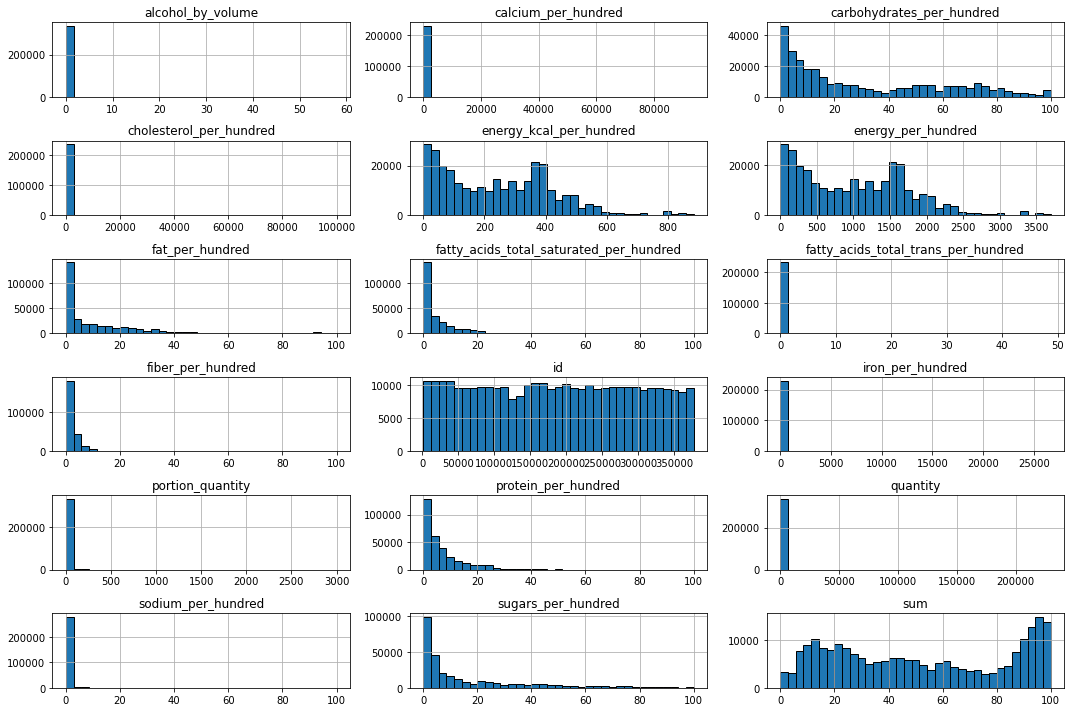

In [55]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=35, figsize=(15, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

While it could be interesting to mention that most of the numerical information presents a clear positive skweness, we will have a further look in the attributes that mostly contain information of a single category: calcium, cholesterol, fatty acids total trans, fiber, iron and sodium.

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

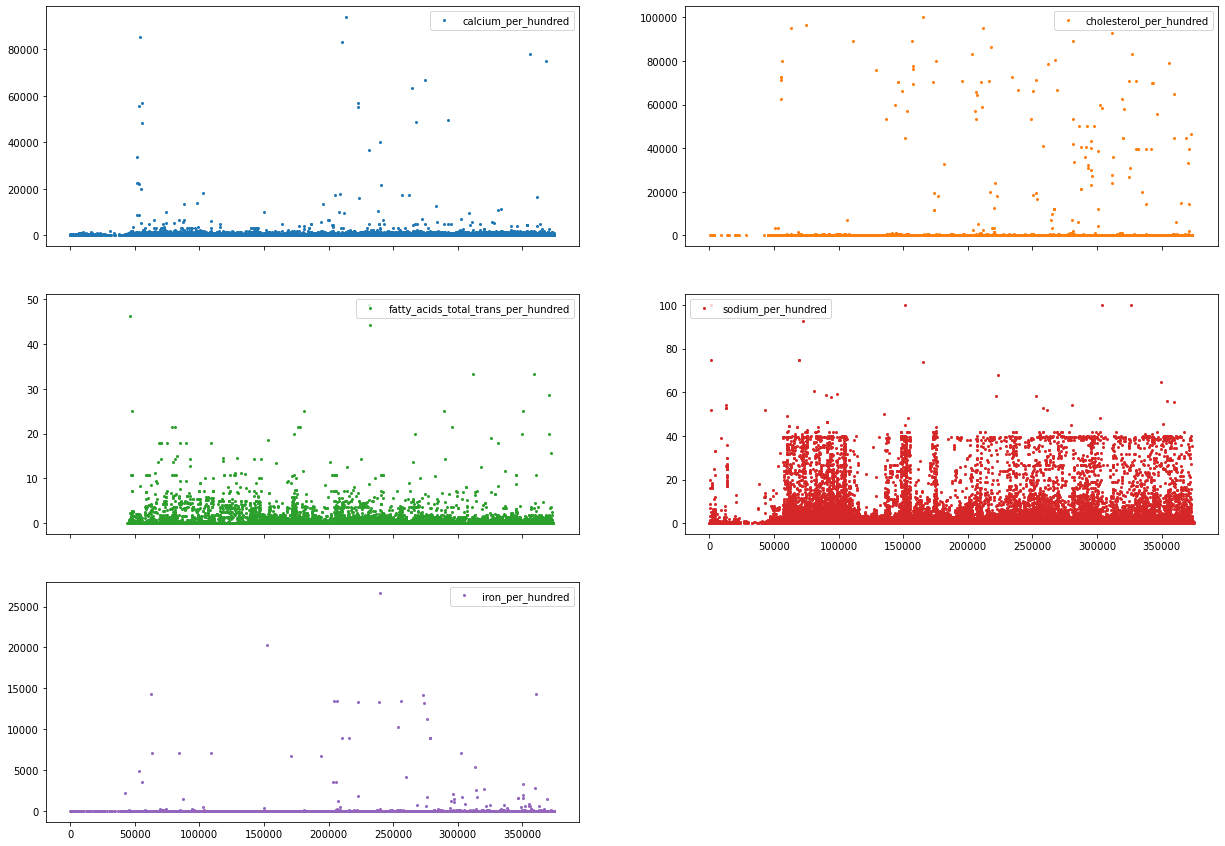

In [56]:
# Show histogram of two particular features
df[
    [
        "calcium_per_hundred",
        "cholesterol_per_hundred",
        "fatty_acids_total_trans_per_hundred",
        "sodium_per_hundred",
        "iron_per_hundred",
    ]
].plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(21, 15), markersize=4)

The following decision responds to the idea that although all of these data points in this attributes are contained within less than three times the standard deviation of each sample, the following may be assumed. There are a small amount of points that present a huge deviation in comparison to the main data. As, this points distort the samples' means and standard deviations they will be removed from the dataset. The following values correspond to the selected thresholds:
* the calcium will be accepted up to a value of **7500** [mg]
* the cholesterol will be accepted up to a value of **2500** [mg]
* the fatty acids total trans will be accepted up to a value of **10** [g]
* the sodium will be acceptedd up to a value of **42** [g]
* the iron will be accepted up to a value of **100** [mg]

Text(0.5, 1.0, 'Alcohol')

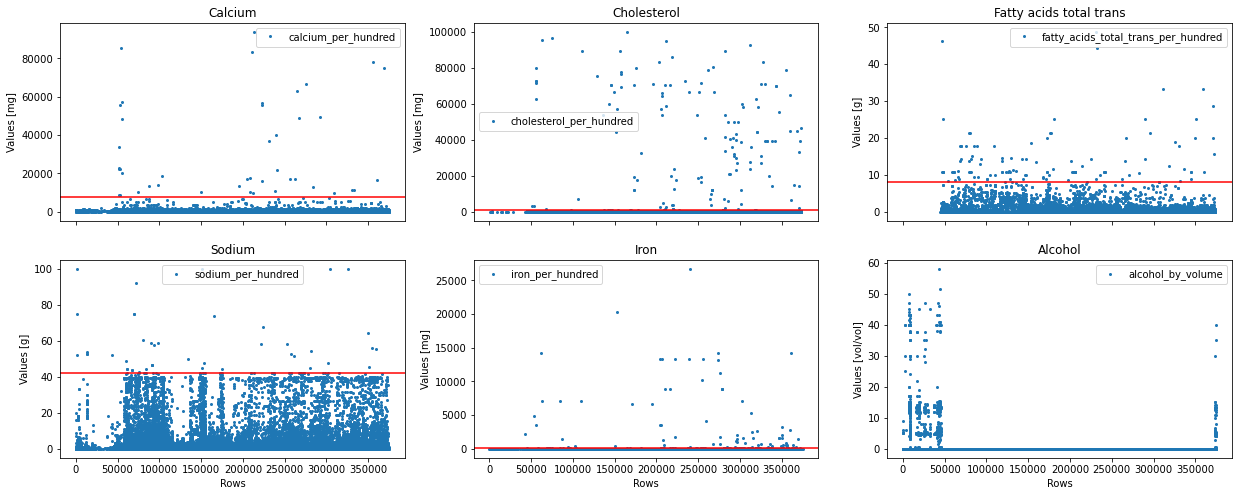

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(21, 8), sharex=True)

df[["calcium_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[0, 0],
)
axes[0, 0].axhline(7500, color="red")

df[["cholesterol_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[0, 1],
)
axes[0, 1].axhline(1000, color="red")

df[["fatty_acids_total_trans_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[0, 2],
)
axes[0, 2].axhline(8, color="red")

df[["sodium_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[1, 0],
)
axes[1, 0].axhline(42, color="red")

df[["iron_per_hundred"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[1, 1],
)
axes[1, 1].axhline(100, color="red")

df[["alcohol_by_volume"]].plot(
    lw=0,
    marker=".",
    subplots=True,
    layout=(-1, 1),
    figsize=(7, 4),
    markersize=4,
    ax=axes[1, 2],
)

axes[0, 0].set_ylabel("Values [mg]")
axes[0, 1].set_ylabel("Values [mg]")
axes[0, 2].set_ylabel("Values [g]")
axes[1, 0].set_ylabel("Values [g]")
axes[1, 1].set_ylabel("Values [mg]")
axes[1, 2].set_ylabel("Values [vol/vol]")

axes[0, 0].set_xlabel("Rows")
axes[0, 1].set_xlabel("Rows")
axes[0, 2].set_xlabel("Rows")
axes[1, 0].set_xlabel("Rows")
axes[1, 1].set_xlabel("Rows")
axes[1, 2].set_xlabel("Rows")

axes[0, 0].set_title("Calcium")
axes[0, 1].set_title("Cholesterol")
axes[0, 2].set_title("Fatty acids total trans")
axes[1, 0].set_title("Sodium")
axes[1, 1].set_title("Iron")
axes[1, 2].set_title("Alcohol")

We will now drop the information that is over the red lines that have been plotted for each attribute

In [58]:
print(
    "The original shape of the DataFrame before selecting this outliers was "
    + str(df.shape)
)
filter_calcium = df["calcium_per_hundred"] > 7500
df_keep = df.loc[filter_calcium, "calcium_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the calcium outliers the new shape is " + str(df.shape))

filter_cholesterol = df["cholesterol_per_hundred"] > 1000
df_keep = df.loc[filter_cholesterol, "cholesterol_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the cholesterol outliers the new shape is " + str(df.shape))

filter_fatty_acids_total_trans = df["fatty_acids_total_trans_per_hundred"] > 8
df_keep = df.loc[filter_fatty_acids_total_trans, "fatty_acids_total_trans_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print(
    "After eliminating the fatty acid total trans outliers the new shape is "
    + str(df.shape)
)
filter_sodium = df["sodium_per_hundred"] > 42
df_keep = df.loc[filter_sodium, "sodium_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the sodium outliers the new shape is " + str(df.shape))

filter_iron = df["iron_per_hundred"] > 100
df_keep = df.loc[filter_iron, "iron_per_hundred"]
df = df.drop(df_keep.index, axis=0)
print("After eliminating the iron outliers the new shape is " + str(df.shape))

The original shape of the DataFrame before selecting this outliers was (337015, 64)
After eliminating the calcium outliers the new shape is (336972, 64)
After eliminating the cholesterol outliers the new shape is (336835, 64)
After eliminating the fatty acid total trans outliers the new shape is (336714, 64)
After eliminating the sodium outliers the new shape is (336668, 64)
After eliminating the iron outliers the new shape is (336576, 64)


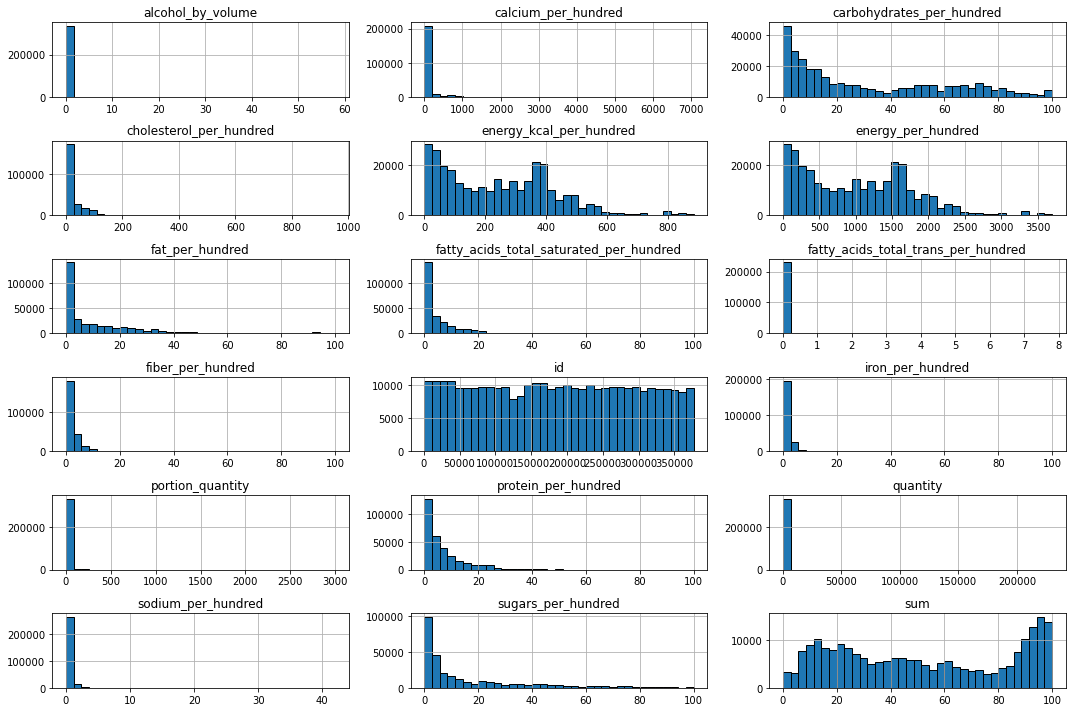

In [59]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=35, figsize=(15, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout()

**Observations:**

##### [Return to the table of contents](#Table)

<a id="Indepth"></a>
### **C. In-depth Exploratory Data Analysis**

#### C1. What is the nutrients’ distribution per country? You can choose any subset of the nutrients you want to analyze (e.g. macronutrients, minerals, or vitamins).

We will now take a look at the distribution of some nutrients per country. For this analysis, we will include those attributes that are usually related with the development of obesity and hypertension. This analysis could result in interesting results, as heart attacks, which are the most common cause of death among the population, is thought to be linked with malnutrition associated to high intakes of the following nutrients: (1) alcohol, (2) carbohydrates, (3) fat, (4) trans fatty acids, (5) sodium and (6) sugars. We will also include (7) protein and (8) fiber for knowing if countries with less alimentary disease cases have a higher intake of these products.

In [60]:
df.groupby("country")[list(df.select_dtypes(include=np.number))].count()

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,id,iron_per_hundred,portion_quantity,protein_per_hundred,quantity,sodium_per_hundred,sugars_per_hundred,sum
country,,,,,,,,,,,,,,,,,,
CH,33028,555,22249,17,22460,22461,22211,0,0,14484,33028,205,33028,22103,33028,1047,20339,849
DE,10636,12,982,0,985,986,977,0,0,363,10636,9,10636,974,10636,3,985,2
FR,117,2,52,0,53,53,51,0,0,29,117,1,117,52,117,0,48,0
IT,2719,6,269,0,278,277,267,0,0,180,2719,8,2719,268,2719,0,270,0
US,290076,229078,286834,235022,278091,278092,284178,242316,233904,232365,290076,228663,290076,288886,290076,284992,271016,227868


If we want to have any interesting information regarding alcohol consumption, we will first drop the values that are 0. This must be done as most of the consumed food products do not contain alcohol. Therefore, if we maintained this information the histograms of consumption would just look as a big column in zero (as it may be seen in the previous numeric plots)

Text(0, 0.5, 'Values')

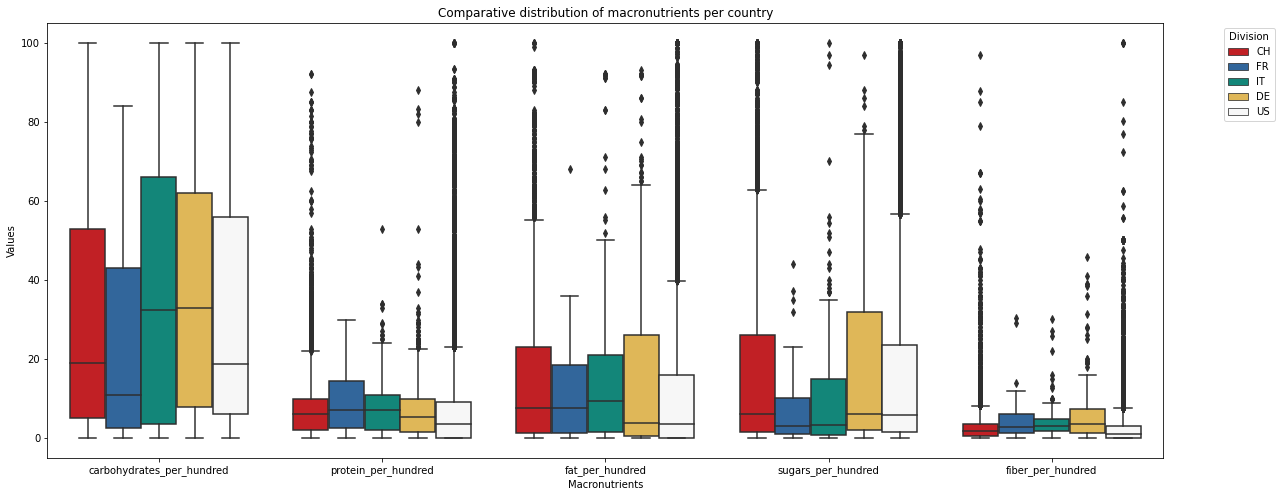

In [61]:
# Inclusion of stripplot for investigating cause of such a small mean value

df_melted = df[
    [
        "carbohydrates_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
        "fiber_per_hundred",
        "fat_per_hundred",
        "country",
    ]
]

df_melted.set_index("country", inplace=True)
dfl = (
    df_melted.stack()
    .reset_index()
    .rename(columns={"level_1": "_per_hundred", 0: "val"})
)

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))

# plot
plt.figure(figsize=(20, 8))
sns.boxplot(x="_per_hundred", y="val", data=dfl, hue="country")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Comparative distribution of macronutrients per country")
plt.xlabel("Macronutrients")
plt.ylabel("Values")

Text(0.5, 1.0, 'Alcohol consumption per country')

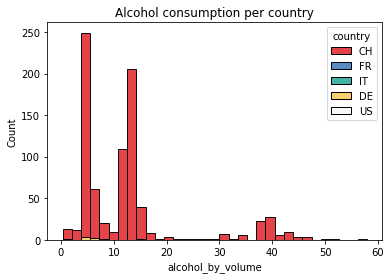

In [62]:
# Inclusion of stripplot for investigating cause of such a small mean value
# We will first remove the zero values from alcohol
df["alcohol_by_volume"] = df["alcohol_by_volume"].replace(0, np.NaN)

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))
# plot
sns.histplot(
    data=df,
    x="alcohol_by_volume",
    hue="country",
    multiple="stack",
)
plt.title("Alcohol consumption per country")

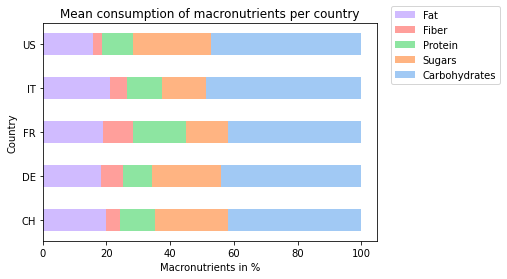

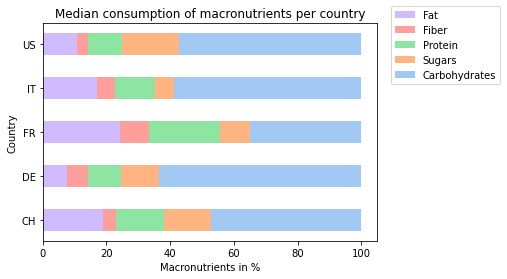

In [63]:
sns.set_palette(sns.color_palette("pastel"))
carbohydrates = df.groupby("country")["carbohydrates_per_hundred"].mean()
sugars = df.groupby("country")["sugars_per_hundred"].mean()
protein = df.groupby("country")["protein_per_hundred"].mean()
fiber = df.groupby("country")["fiber_per_hundred"].mean()
fat = df.groupby("country")["fat_per_hundred"].mean()

macronutrients = carbohydrates + sugars + protein + fiber + fat

carbohydrates = 100 * (carbohydrates / macronutrients)
sugars = 100 * (sugars / macronutrients)
protein = 100 * (protein / macronutrients)
fiber = 100 * (fiber / macronutrients)
fat = 100 * (fat / macronutrients)


b1 = plt.barh(
    macronutrients.index,
    carbohydrates,
    left=sugars + protein + fiber + fat,
    height=0.5,
)

b2 = plt.barh(
    macronutrients.index,
    sugars,
    left=protein + fiber + fat,
    height=0.5,
)

b3 = plt.barh(macronutrients.index, protein, left=fiber + fat, height=0.5)

b4 = plt.barh(macronutrients.index, fiber, left=fat, height=0.5)

b5 = plt.barh(macronutrients.index, fat, height=0.5)

plt.legend(
    [b5, b4, b3, b2, b1],
    [
        "Fat",
        "Fiber",
        "Protein",
        "Sugars",
        "Carbohydrates",
    ],
    loc=(1.04, 0.72),
)

plt.title("Mean consumption of macronutrients per country")
plt.ylabel("Country")
plt.xlabel("Macronutrients in %")
plt.show()

carbohydrates = df.groupby("country")["carbohydrates_per_hundred"].median()
sugars = df.groupby("country")["sugars_per_hundred"].median()
protein = df.groupby("country")["protein_per_hundred"].median()
fiber = df.groupby("country")["fiber_per_hundred"].median()
fat = df.groupby("country")["fat_per_hundred"].median()

macronutrients = carbohydrates + sugars + protein + fiber + fat

carbohydrates = 100 * (carbohydrates / macronutrients)
sugars = 100 * (sugars / macronutrients)
protein = 100 * (protein / macronutrients)
fiber = 100 * (fiber / macronutrients)
fat = 100 * (fat / macronutrients)

b1 = plt.barh(
    macronutrients.index,
    carbohydrates,
    left=sugars + protein + fiber + fat,
    height=0.5,
)

b2 = plt.barh(
    macronutrients.index,
    sugars,
    left=protein + fiber + fat,
    height=0.5,
)

b3 = plt.barh(macronutrients.index, protein, left=fiber + fat, height=0.5)

b4 = plt.barh(macronutrients.index, fiber, left=fat, height=0.5)

b5 = plt.barh(macronutrients.index, fat, height=0.5)

plt.legend(
    [b5, b4, b3, b2, b1],
    [
        "Fat",
        "Fiber",
        "Protein",
        "Sugars",
        "Carbohydrates",
    ],
    loc=(1.04, 0.72),
)

plt.title("Median consumption of macronutrients per country")
plt.ylabel("Country")
plt.xlabel("Macronutrients in %")
plt.show()

#### C2. Your goal is to analyze organic vs. non-organic products distribution in the Open Food database. Look for terms such as “bio” and “organic” in the product names.
* **Count the number of organic and non-organic products in each country. Is there a country with a higher percentage of organic products?**
* **Is there a difference in the nutrients’ distribution between organic and non-organic products in each country?**

For giving answer to the first question:

In [64]:
# Column ingridients
ingredients = df["ingredients_en"]
created_at = df["created_at"]
name = df["product_name_en"]
update = df["updated_at"]

# Let’s look at a full entry.

print(ingredients[1])
print(created_at[1])
print(name[1])
print(update[1])

Bio Milk (Switzerland), kitchen salt
2016-06-01T11:42:25.111Z
Naturaplan Mozzarella
2019-10-30T13:47:12.174Z


By looking at the information present in the object type list, we realized that according to the number of different values and the index name there were only 4 cancidates  that could contain valuable information, we see that 

In [65]:
df["organic"] = df["product_name_en"].str.contains("bio|organic", na=False)
df_bio = df[df["product_name_en"].str.contains("bio|organic", na=False)]
df_notbio = df[~df["product_name_en"].str.contains("bio|organic", na=False)]

In [66]:
df["organic"].sum()
df = df.replace({"organic": {True: "organic", False: "non-organic"}})

In [67]:
# The organic and non organic products per country
df.groupby("country")["organic"].value_counts()

country  organic    
CH       non-organic     32885
         organic           143
DE       non-organic     10626
         organic            10
FR       non-organic       117
IT       non-organic      2714
         organic             5
US       non-organic    290062
         organic            14
Name: organic, dtype: int64

Text(0.5, 1.0, 'Non-Organic products by country')

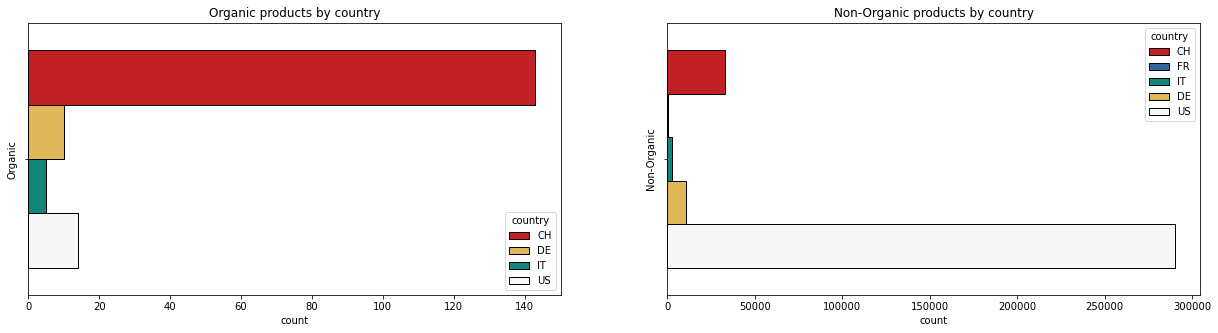

In [68]:
# Create an array with the colors you want to use
colors = ["#DC050C", "#F6C041", "#009988", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(1, 2, figsize=(21, 5))
sns.countplot(
    y="organic", hue="country", data=df_bio, ax=axes[0], linewidth=1, edgecolor="black"
)
axes[0].set_ylabel("Organic")
axes[0].set_yticklabels([""])  # remove the ticks
axes[0].set_title("Organic products by country")

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))

sns.countplot(
    y="organic",
    hue="country",
    data=df_notbio,
    ax=axes[1],
    linewidth=1,
    edgecolor="black",
)
axes[1].set_ylabel("Non-Organic")
axes[1].set_yticklabels([""])  # remove the ticks
axes[1].set_title("Non-Organic products by country")

* Nutrients distribution of organic and non organic products per country

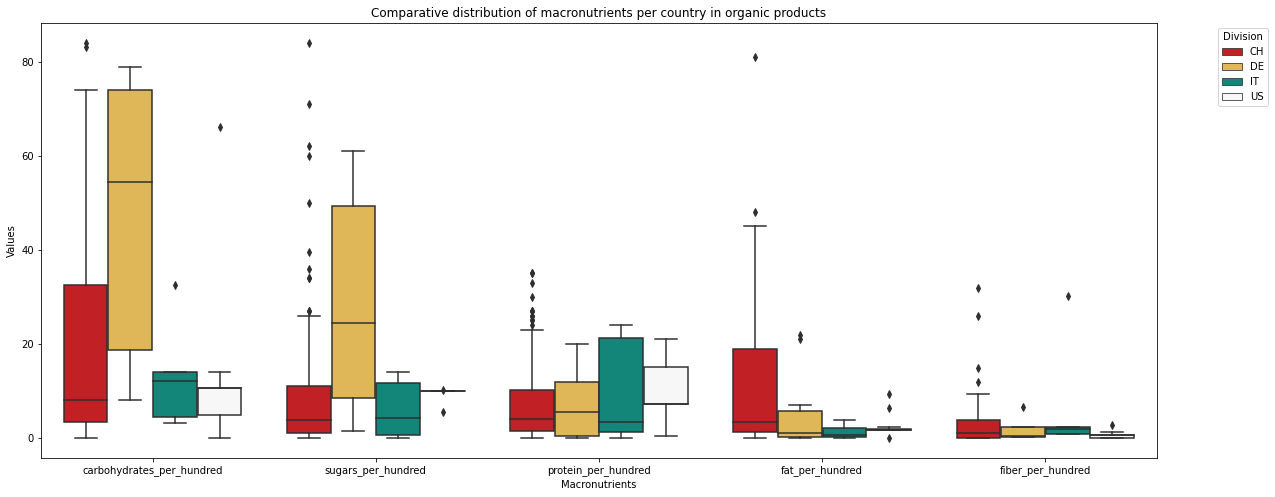

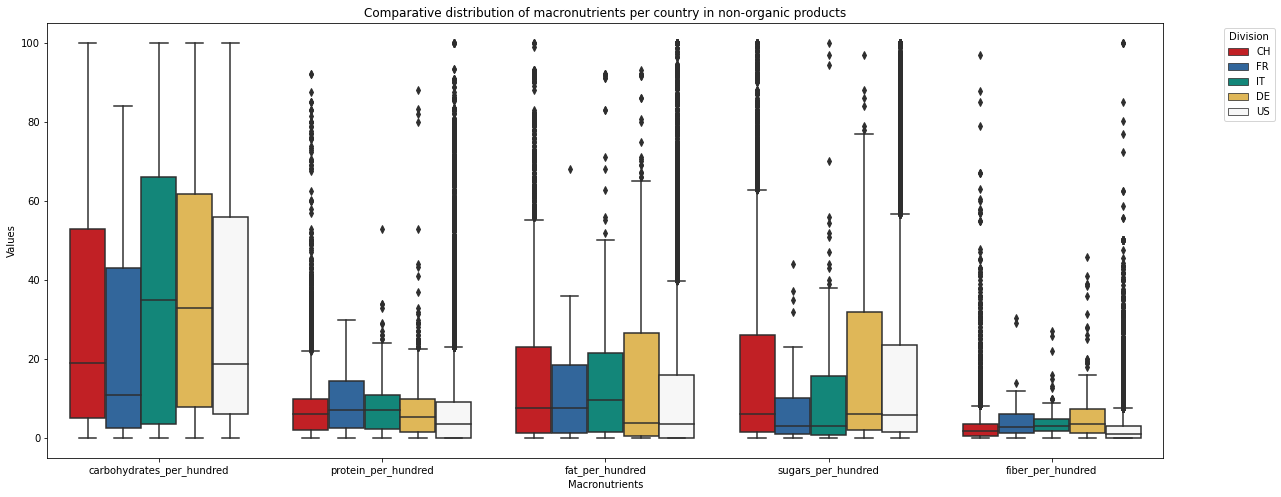

In [69]:
df_melted = df_bio[
    [
        "carbohydrates_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
        "fiber_per_hundred",
        "fat_per_hundred",
        "country",
    ]
]

df_melted.set_index("country", inplace=True)
dfl = (
    df_melted.stack()
    .reset_index()
    .rename(columns={"level_1": "_per_hundred", 0: "val"})
)

# Create an array with the colors you want to use
colors = ["#DC050C", "#F6C041", "#009988", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
# plot
plt.figure(figsize=(20, 8))
sns.boxplot(x="_per_hundred", y="val", data=dfl, hue="country")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Comparative distribution of macronutrients per country in organic products")
plt.xlabel("Macronutrients")
plt.ylabel("Values")
plt.show()


df_melted = df_notbio[
    [
        "carbohydrates_per_hundred",
        "sugars_per_hundred",
        "protein_per_hundred",
        "fiber_per_hundred",
        "fat_per_hundred",
        "country",
    ]
]

df_melted.set_index("country", inplace=True)
dfl = (
    df_melted.stack()
    .reset_index()
    .rename(columns={"level_1": "_per_hundred", 0: "val"})
)

colors2 = ["#DC050C", "#2166AC", "#009988", "#F6C041", "#F7F7F7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors2))

# plot
plt.figure(figsize=(20, 8))
sns.boxplot(x="_per_hundred", y="val", data=dfl, hue="country")
plt.legend(title="Division", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title(
    "Comparative distribution of macronutrients per country in non-organic products"
)
plt.xlabel("Macronutrients")
plt.ylabel("Values")
plt.show()

##### [Return to the table of contents](#Table)

<a id="Text"></a>
### **D. Text data**

The essential methods and skills for data analysis can vary from one data type to another. For instance, text data requires different manipulation techniques than numerical data. One example of text data in the Open Food database is available in the ingredients_en column. In this task, you will work with the ingredients_en column; your goal is to preprocess the text data in this column and answer the following questions.
* Be careful with text normalization:

punctuation, e.g., “water.” vs. “water”
capitalization, e.g., “water” vs. “Water”
white spaces removal, e.g., “ water” vs. “water”
special characters, e.g. “raw beef [soja sauce (with ble), …]”

In [70]:
print("Data shape: ", df.shape)
# Check for missing values

df.dropna(subset=["ingredients_en"], inplace=True)

Data shape:  (336576, 65)


In [71]:
print("Data shape: ", df.shape)

Data shape:  (297875, 65)


In [72]:
pd.set_option("display.max_colwidth", 500)

df["ingredients_en"].sample(3)

233029    TOMATO PUREE (WATER, TOMATO PASTE), WATER, MEATBALLS (BEEF, PORK, WATER, BREADCRUMBS [ENRICHED WHEAT FLOUR {WHEAT FLOUR, NIACIN, FERROUS SULFATE, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID}, DEXTROSE, SALT, YEAST, SOYBEAN OIL], TEXTURED SOY PROTEIN [SOY FLOUR, CARAMEL COLOR], SOY PROTEIN CONCENTRATE, SALT, SOY PROTEIN ISOLATE, POTASSIUM CHLORIDE, NATURAL FLAVOR, SPICE EXTRACT, CARAMEL COLOR), ENRICHED PASTA PRODUCT (WHEAT FLOUR, TRICALCIUM PHOSPHATE, NIACIN, FERROUS SULFATE, THIAMINE MONON...
281432                                                                                                                                                                                                                                                                                             CULTURED GRADE A NON FAT MILK, CHICORY ROOT FIBER, WATER, CONTAINS LESS THAN 1% OF NATURAL FLAVORS, STEVIA LEAF EXTRACT, TURMERIC (FOR COLOR), CAROB BEAN GUM, LEMON JUICE CONCENTRATE, SEA SALT, VITAM

In [73]:
# Count the number of tokens in document
len(df["ingredients_en"][0].split())

17

In [74]:
# In the next cell, we use the apply function to count the number of tokens in each product
df["ingredients_en"].apply(lambda x: len(x.split())).sort_values(ascending=False)

51629     536
275300    485
350670    479
241595    475
241579    448
         ... 
11169       1
306385      1
149084      1
202725      1
306172      1
Name: ingredients_en, Length: 297875, dtype: int64

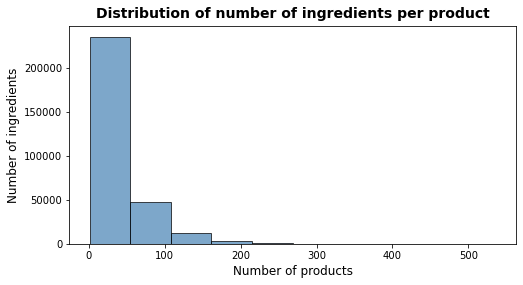

In [75]:
# Plot the number of tokens per product

# Barplot and font specifications
barplot_specs = {"color": "steelblue", "alpha": 0.7, "edgecolor": "black"}
label_specs = {"fontsize": 12}
title_specs = {"fontsize": 14, "fontweight": "bold", "y": 1.01}

plt.figure(figsize=(8, 4))

plt.hist(df["ingredients_en"].apply(lambda x: len(x.split())), **barplot_specs)
plt.xlabel("Number of products", **label_specs)
plt.ylabel("Number of ingredients", **label_specs)
plt.title("Distribution of number of ingredients per product", **title_specs)
plt.show()

In [76]:
sample = df["ingredients_en"][10]

In [77]:
import re

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

# Print stopwords

print("{} stopwords in NLTK's list.\n".format(len(stopwords_english)))
print(stopwords_english)

# append words evidenced in the iterative process of most common

# First 30 iterations
stopwords_english.append("natural")
stopwords_english.append("organic")
stopwords_english.append("flavor")
stopwords_english.append("powder")
stopwords_english.append("vitamin")
stopwords_english.append("juice")
stopwords_english.append("less")
stopwords_english.append("contains")
stopwords_english.append("artificial")
stopwords_english.append("2%")
stopwords_english.append("red")

# Second 30 iterations
stopwords_english.append("color")
stopwords_english.append("modified")
stopwords_english.append("concentrate")
stopwords_english.append("extract")
stopwords_english.append("flavors")
stopwords_english.append("folic")

# Third 30 iterations
stopwords_english.append("yellow")

print(stopwords_english)


def preprocess_text(text):

    """
    This function preprocesses raw samples of text:
    - Converts to lowercase
    - Replaces common punctuation marks with whitespace
    - Removes stop words
    - Splits text on whitespace

    INPUT:
    - text: "raw" text (string)

    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    """

    # Convert to lowercase
    clean_text = text.lower()

    # Replace common punctuation marks with whitespace
    clean_text = re.sub(r"[,.()]", " ", clean_text)

    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s", " ", clean_text)

    # Remove stop words and split on whitespace
    processed_sample_tokens = [
        tok for tok in clean_text.split() if tok not in stopwords_english
    ]

    return processed_sample_tokens

179 stopwords in NLTK's list.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',

#### D1. * Which product has the longest ingredients list? 

In [78]:
# 2nd alternative (using the apply method)

df["clean_text"] = df["ingredients_en"].apply(lambda x: preprocess_text(x))

In [79]:
df["count_ingredients"] = (
    df["ingredients_en"].apply(lambda x: len(x.split())).sort_values(ascending=False)
)

In [80]:
df.sort_values(by="count_ingredients", ascending=False, inplace=True)

In [81]:
print(
    "The products with the shortest amount of ingredients are in total  "
    + str((df["count_ingredients"] == 1).sum())
    + ". Due to the large number, their names are contained in the list shortest_ingredients"
)
shortest_ingredients = df[(df["count_ingredients"] == 1)]["product_name_en"]

The products with the shortest amount of ingredients are in total  4583. Due to the large number, their names are contained in the list shortest_ingredients


#### D2. Which products have the shortest ingredients list?

In [82]:
print(
    "The product with the longest amount of ingredients is "
    + str(df["product_name_en"][df["count_ingredients"].index[0]])
)

The product with the longest amount of ingredients is Gamesa Lonchera Assorted Cookies 14.3 Ounce 5 Pack Box


#### D3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.

In [83]:
df["clean_text"] = df["clean_text"].astype("string")
from collections import Counter

most_common = Counter(" ".join(df["clean_text"]).split()).most_common(30)

In [84]:
df_common = pd.DataFrame(most_common, columns=["Ingredient", "Number of appearences"])
df_common = df_common.replace(",", "", regex=True)
df_common = df_common.replace("'", "", regex=True)
df_common

,Ingredient,Number of appearences
0,salt,298808
1,acid,203863
2,oil,202986
3,sugar,202969
4,water,184737
5,flour,174589
6,corn,157950
7,milk,153390
8,sodium,152960
9,wheat,124185


Text(0.5, 1.0, '30 Most common ingredients')

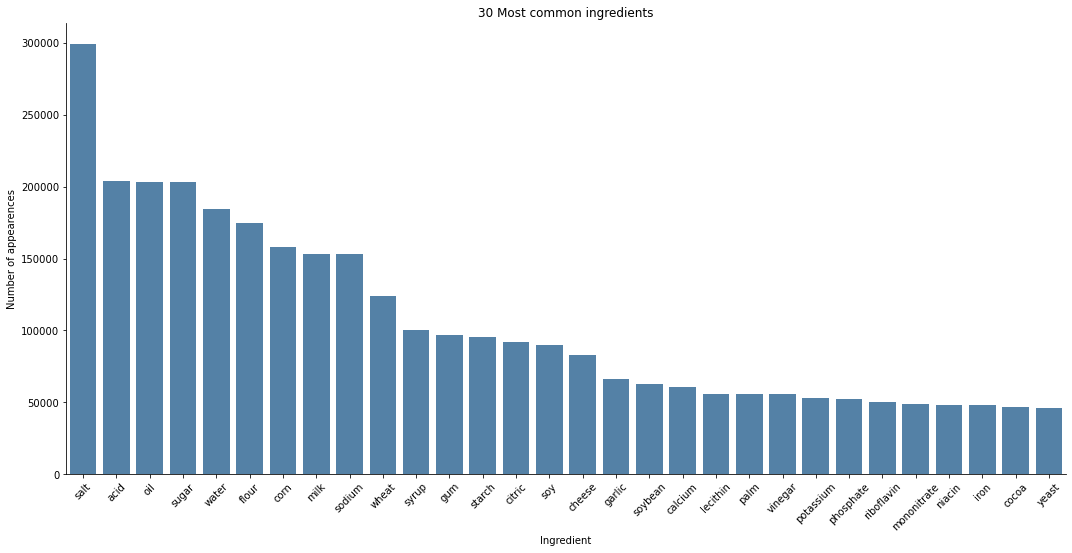

In [85]:
# Plot the most common ingredients found in the respective column after cleaning
g = sns.catplot(
    x="Ingredient",
    y="Number of appearences",
    data=df_common,
    kind="bar",
    height=7,
    aspect=15 / 7,
    color="steelblue",
)
g.set_xticklabels(rotation=45)
plt.title("30 Most common ingredients")

##### [Return to the table of contents](#Table)

<a id="Timeseries"></a>
### E. Time-series data


Another data type that requires specific methods and skills for analysis is time-series data. Although the Open Food database is not a time-series database, it contains several columns with dates and times, allowing for a simple investigation. In this task, you will work with the created_at column that stores the date and time at which products were added to the Open Food database. You will analyze the total number of products added to the database.**

#### E1. Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair.**

In [86]:
# convert column to datetime pandas
df["created_at"] = pd.to_datetime(df["created_at"])
df["date"] = pd.to_datetime(df["created_at"])

In [87]:
df["hour"] = pd.to_datetime(df["created_at"]).dt.hour

In [88]:
df["month"] = pd.to_datetime(df["created_at"]).dt.month

In [89]:
df_heatmap = (
    df.groupby("month")["hour"]
    .value_counts()
    .unstack("hour", fill_value=0)
    .reset_index()
)
df_heatmap.drop("month", axis=1, inplace=True)

Text(0.5, 1.0, 'Heatmap for counting the number of objects created')

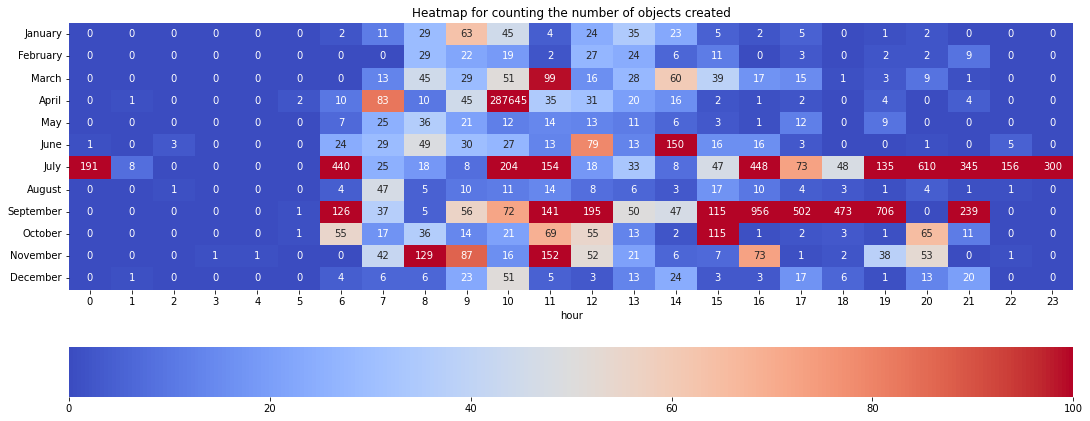

In [90]:
cols = (
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
)
f, ax = plt.subplots(figsize=(18, 7))
ax = sns.heatmap(
    df_heatmap,
    ax=ax,
    cbar_kws={"orientation": "horizontal"},
    vmin=0,
    vmax=100,
    annot=True,
    fmt="d",
    cmap="coolwarm",
)
ax.set_yticklabels(cols, rotation=0)
ax.set_title("Heatmap for counting the number of objects created")

**Observations:**

#### E2. Your task is to investigate the evolution of the total number of items over time. You should draw a bar plot with the date (e.g., in yyyy-mm format) on the x-axis and the total number of items created during each month on the y-axis. Each bar in the plot should stack the number of items created by each country each month. Please make sure all bars are visible by choosing the appropriate scale for the y-axis.

In [91]:
df["month_year"] = df["date"].dt.to_period("M")
df.sort_values("month_year", ascending=False)

df_plot = (
    df.groupby(["country", "month_year"])
    .size()
    .reset_index()
    .pivot(columns="country", index="month_year", values=0)
)

C:\Users\56975\anaconda3\envs\adsml\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


Text(0, 0.5, 'Number of products')

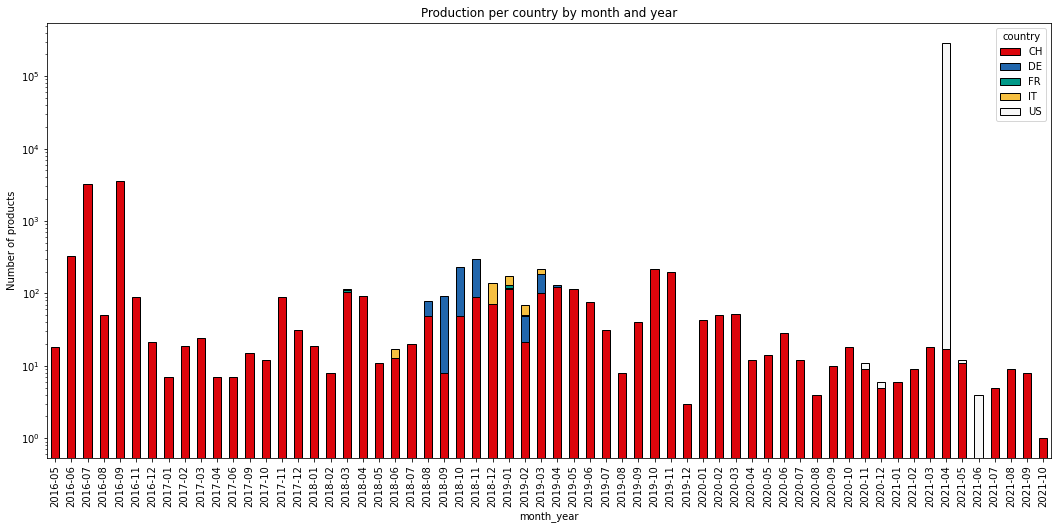

In [92]:
df_plot.plot(figsize=(18, 8), kind="bar", stacked=True, log=True, edgecolor="black")
# Just add a title and rotate the x-axis labels to be horizontal.
plt.title("Production per country by month and year")
plt.xticks(rotation=90, ha="center")
plt.ylabel("Number of products")

**Observations**

<a id="Correlation"></a>
### F. Correlation analysis

Data analysis usually entails studying the strength of correlations in the data. This is important because studying correlations helps to set expectations on which machine learning models can better capture these correlations. A correlation analysis can be quantitative (e.g., based on standard correlation measures) or qualitative (e.g., based on visualizations). Also, methods of correlation analysis can vary from one data type to another. In this task, you will do quantitative and qualitative correlation analysis for some of the columns in the data.

#### F1. Your task is to quantify the linear relationships between the energy_per_hundred and other numerical variables. Use the per_hundred columns and find their correlations with energy_per_hundred.
#### F2. Your task is to reveal the true nature of the relationship, linear or non-linear, between variables, using visualizations. Based on the correlation coefficients you found in the previous task, pick the three most correlated and the three least correlated variables (in absolute terms) with the energy_per_hundred column. Plot them against the energy_per_hundred column, using scatterplots. You should obtain these plots as subplots (with 2 rows and 3 columns) or seaborn pairplots.
* Please comment on the visual relationships in a markdown cell. Are they all linear? Are there still extreme values that, once removed, relationships would change?
#### F3. Your task is to test the independence of two categorical variables statistically. Use the energy_per_hundred column to create a new variable with three categories low energy, medium energy and high energy. Test if the level of energy in the product is associated with the country where the product is produced.